In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pynamicalsys import DiscreteDynamicalSystem as dds

In [2]:
u = 0.5
ds = dds(model="logistic map")

In [3]:
%%time
u = 0.5
param_range = (2.4, 4, 500)
lypnv = np.zeros(param_range[2])
for i in range(param_range[2]):
    parameters = param_range[0] + i * (param_range[1] - param_range[0]) / (param_range[2] - 1)

    lypnv[i] = ds.lyapunov(u, 1000, parameters=parameters, transient_time=500)

CPU times: user 425 ms, sys: 30.7 ms, total: 455 ms
Wall time: 459 ms


In [6]:
%%time
transient_time = 10000
total_time = 1000 + transient_time
u = 0.5
param_range = (2.4, 4, 500)
rte = np.zeros(param_range[2])
for i in range(param_range[2]):
    parameters = param_range[0] + i * (param_range[1] - param_range[0]) / (param_range[2] - 1)

    rte[i] = ds.recurrence_time_entropy(u, total_time, parameters=parameters, transient_time=transient_time)

CPU times: user 746 ms, sys: 7.4 ms, total: 753 ms
Wall time: 755 ms


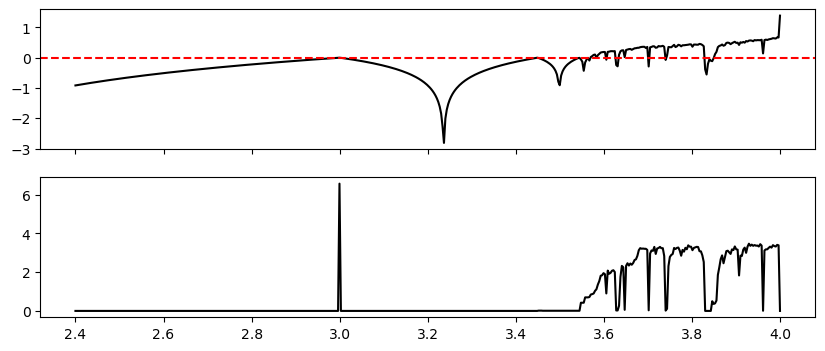

In [7]:
fig, ax = plt.subplots(2, 1, figsize=(10, 4), sharex=True)
ax[0].plot(np.linspace(param_range[0], param_range[1], param_range[2]), lypnv, "k")
# Plot line at y=0
ax[0].axhline(0, color="red", linestyle="--")

ax[1].plot(np.linspace(param_range[0], param_range[1], param_range[2]), rte, "k")